In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import sklearn.preprocessing as preprocessing

The following function creates one dimensional linear data and add a gaussian noise i.e $y = a \times x + \varepsilon$

In [8]:
def generate_data(n, a, variance):
    X = np.random.normal(size=(n,))
    y = X * a + np.sqrt(variance) * np.random.normal(size=(n,))
    return X.reshape((-1,1)), y

We generate and plot some arbitrary randomized data $(X,Y)$ along the noiseless function $y=ax$.

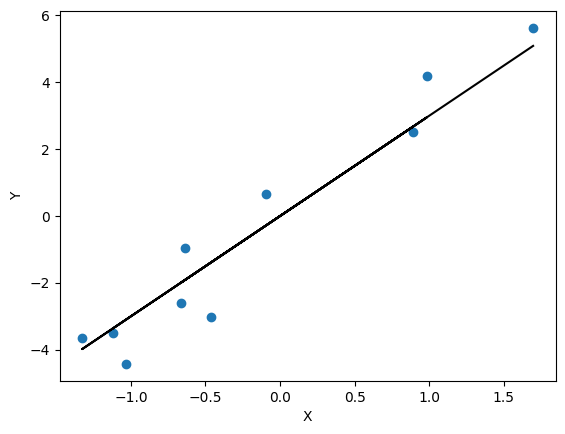

In [9]:
a = 3; n = 10; 
X, y = generate_data(n, a, 0.5)

plt.scatter(X, y)
plt.xlabel('X'); plt.ylabel('Y')
plt.plot(X,a*X, c='k')
plt.show()

Next we want to compute the least-square regression using closed form. We use this function on the training data generated above.

In [10]:
def linear_regression(X, y):
    """
    arguments:
        - X : input data matrix
        - y : output
    returns:
        - w : the least square estimator
    """
    X_cov = X.T @ X # Covariance matrix
    X_plus = np.linalg.inv(X_cov) @ X.T #Psuedo inverse of X
    w = X_plus @ y # Least squares estimator
    return w

In [14]:
# Print the predicted weights (coefficient + bias)

w = linear_regression(X, y)
w

# Plot the training points and the predictor evaluated on a set of test points

X_test = np.linspace(np.min(X), np.max(X), 10)
y_test_pred = np.dot(X_test, w) 

plt.scatter(X, y)
plt.plot(X_test, a * X_test, 'k')
plt.plot(X_test, y_test_pred, 'r--')
plt.xlabel('X')
plt.ylabel('y')

ValueError: shapes (10,) and (1,) not aligned: 10 (dim 0) != 1 (dim 0)